In [1]:
#import the libraries  
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

In [3]:
#import suicide rates dataset 
suicide_rates_GPD = pd.read_csv('Downloads/GDP_per_Capita_and_Suicide_rates.csv')

In [4]:
#explore the dataset
#check the first 5 rows
suicide_rates_GPD.head()

,CountryName,Country Code,GDP_PerCapita_2000 US$,SuicideRate_2000,GDP_PerCapita_2005 US$,SuicideRate_2005,GDP_PerCapita_2010 US$,SuicideRate_2010,GDP_PerCapita_2015 US$,SuicideRate_2015,GDP_PerCapita_2016 US$,SuicideRate_2016
0,Afghanistan,AFG,NaN,5.7,242.031379,6.3,543.303042,5.1,578.466353,4.8,547.228110,4.7
1,Angola,AGO,556.836318,7.9,1902.422346,7.2,3587.883798,5.7,4166.979684,5.0,3506.072885,4.7
2,Albania,ALB,1126.683318,5.5,2673.787283,6.7,4094.358816,7.8,3952.830781,6.0,4124.108543,6.3
3,United Arab Emirates,ARE,33291.419370,3.2,39365.335920,3.1,33893.303510,3.0,38663.383810,2.8,38141.846760,2.8
4,Argentina,ARG,7708.100996,9.5,5109.851325,9.0,10385.964430,8.7,13789.060420,8.8,12790.242470,9.2


In [5]:
#check the number of columns & rows 
suicide_rates_GPD.shape

(160, 12)

In [6]:
#check the details about the columns
suicide_rates_GPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CountryName             160 non-null    object 
 1   Country Code            160 non-null    object 
 2   GDP_PerCapita_2000 US$  155 non-null    float64
 3   SuicideRate_2000        160 non-null    float64
 4   GDP_PerCapita_2005 US$  158 non-null    float64
 5   SuicideRate_2005        160 non-null    float64
 6   GDP_PerCapita_2010 US$  158 non-null    float64
 7   SuicideRate_2010        160 non-null    float64
 8   GDP_PerCapita_2015 US$  158 non-null    float64
 9   SuicideRate_2015        160 non-null    float64
 10  GDP_PerCapita_2016 US$  158 non-null    float64
 11  SuicideRate_2016        160 non-null    float64
dtypes: float64(10), object(2)
memory usage: 15.1+ KB


In [7]:
#check if there is any missing value
suicide_rates_GPD.isnull().sum()

CountryName               0
Country Code              0
GDP_PerCapita_2000 US$    5
SuicideRate_2000          0
GDP_PerCapita_2005 US$    2
SuicideRate_2005          0
GDP_PerCapita_2010 US$    2
SuicideRate_2010          0
GDP_PerCapita_2015 US$    2
SuicideRate_2015          0
GDP_PerCapita_2016 US$    2
SuicideRate_2016          0
dtype: int64

In [8]:
#clean the data
#remove the unnecessary columns 
suicide_rates_GPD.drop(['Country Code', 'GDP_PerCapita_2000 US$', 'SuicideRate_2000', 'GDP_PerCapita_2005 US$', 
                        'SuicideRate_2005', 'GDP_PerCapita_2010 US$', 'SuicideRate_2010', 'GDP_PerCapita_2015 US$',
                        'GDP_PerCapita_2016 US$'], axis=1, inplace=True)
'''I removed the columns that contains GDP for 2015 & 2016, because they have missing values, and the happiness report have
this data'''

In [9]:
#make the country name columns the index so we can join the datasets after
suicide_rates_GPD.set_index('CountryName', inplace=True)

In [10]:
suicide_rates_GPD.head()

,SuicideRate_2015,SuicideRate_2016
CountryName,,
Afghanistan,4.8,4.7
Angola,5.0,4.7
Albania,6.0,6.3
United Arab Emirates,2.8,2.8
Argentina,8.8,9.2


In [11]:
#we need to split this dataset to two datasets, one for 2015, and the other for 2016
suicide_rates_2015 = pd.DataFrame(suicide_rates_GPD.iloc[:, 0:1])
suicide_rates_2015.head()

,SuicideRate_2015
CountryName,
Afghanistan,4.8
Angola,5.0
Albania,6.0
United Arab Emirates,2.8
Argentina,8.8


In [12]:
suicide_rates_2016 = pd.DataFrame(suicide_rates_GPD.loc[:, ['SuicideRate_2016']])
suicide_rates_2016.head()

,SuicideRate_2016
CountryName,
Afghanistan,4.7
Angola,4.7
Albania,6.3
United Arab Emirates,2.8
Argentina,9.2


In [13]:
#make sure these two datasets are clean and there is no missing value
suicide_rates_2015.isnull().sum()

SuicideRate_2015    0
dtype: int64

In [14]:
suicide_rates_2016.isnull().sum()

SuicideRate_2016    0
dtype: int64

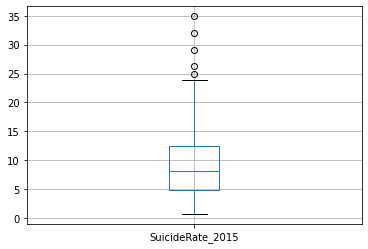

In [15]:
#let's apply some analysis on suicide rates for 2015 & 2016
#apply boxplot to the dataset to explore the min, max, median, & outliers
suicide_rates_2015.boxplot()

In [16]:
''''the boxplot shows that the top 5 countries are outliers, which means that the top 5 countries have suicide rate 
that differ so much from the rest of the world'''
#let's see what are these countries
top5_counrties_2015 = suicide_rates_2015.sort_values(by='SuicideRate_2015', ascending=False).head(5)
top5_counrties_2015

,SuicideRate_2015
CountryName,
Lithuania,34.9
Russian Federation,32.1
Guyana,29.1
Belarus,26.3
Kazakhstan,24.9


In [17]:
#interesting that 4 of the top 5 countries are in Europe (Kazakhstan locates in Eurasia)

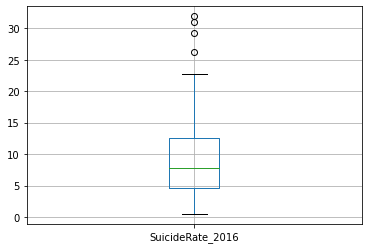

In [18]:
#Let's analyze the suicide rates for 2016 as we did with the suicide rates for 2015 data
#apply boxplot to the dataset to explore the min, max, median, & outliers
suicide_rates_2016.boxplot()

In [19]:
'''we can see there was a slight decline in the number of outliers (from 5 to 4), in the max rates 
(in 2015 the max rate was almost 35 & in 2016 the max rate was almost 32)'''

In [20]:
#let's check the top 5 countries for 2016
top5_counrties_2016 = suicide_rates_2016.sort_values(by='SuicideRate_2016', ascending=False).head(5)
top5_counrties_2016

,SuicideRate_2016
CountryName,
Lithuania,31.9
Russian Federation,31.0
Guyana,29.2
Belarus,26.2
Suriname,22.8


In [21]:
'''besides the slight decline in suicide rates for the top 5 countries in 2016, Kazakhstan was not in the top 5 countries
instead Suriname took the 5th place, & as a result, there were 3 counrties from Eurpoe, and 2 from South America'''

In [23]:
#we finished cleaning and suicide rate datasets, let's move to world happiness report datasets
#import world happiness report 2015 dataset
World_Happiness_Report_2015= pd.read_csv('Downloads/World_Happiness_Report_2015.csv')

In [24]:
#explore the dataset
#check the first 5 rows
World_Happiness_Report_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [25]:
#check the number of columns & rows 
World_Happiness_Report_2015.shape

(158, 12)

In [26]:
#check details about the columns
World_Happiness_Report_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [27]:
#check if there is missing value
World_Happiness_Report_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [28]:
#clean the data
#remove the unnecessary columns 
World_Happiness_Report_2015.drop(['Region','Happiness Rank', 'Standard Error', 'Dystopia Residual'], axis=1, inplace=True)

In [29]:
#make the country name columns the index so we can join the datasets after
World_Happiness_Report_2015.set_index('Country', inplace=True)

In [30]:
#check how the dataset look like after cleaning
World_Happiness_Report_2015.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Country,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [31]:
World_Happiness_Report_2015.shape

(158, 7)

In [33]:
#import world happiness report 2016 dataset
World_Happiness_Report_2016= pd.read_csv('Downloads/World_Happiness_Report_2016.csv')

In [34]:
#explore the dataset
#check the first 5 rows
World_Happiness_Report_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [35]:
#check the number of columns & rows 
World_Happiness_Report_2016.shape

(157, 13)

In [36]:
#check details about the columns
World_Happiness_Report_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [37]:
#check if there is missing value
World_Happiness_Report_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [38]:
#clean the data
#remove the unnecessary columns 
World_Happiness_Report_2016.drop(['Region', 'Happiness Rank', 'Lower Confidence Interval','Upper Confidence Interval', 'Dystopia Residual'], axis=1, inplace=True)

In [39]:
#make the country name columns the index so we can join the datasets after
World_Happiness_Report_2016.set_index('Country', inplace=True)

In [40]:
#check how the dataset look like after cleaning
World_Happiness_Report_2016.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Country,,,,,,,
Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [41]:
World_Happiness_Report_2016.shape

(157, 7)

In [42]:
''''now we need to merge the datasets for 2015 in one dataset & the datasets for 2016 in another dataset, so we will have
2 datasets, one for suicide rates & happiness report for 2015 dataset & the other one for suicide rates & happiness report 
for 2016 dataset'''
suiciderate_happiness_report_2015 = World_Happiness_Report_2015.join(suicide_rates_2015, how='inner')
suiciderate_happiness_report_2015.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,SuicideRate_2015
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,17.1
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,14.0
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,11.9
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,12.4
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,12.5


In [43]:
suiciderate_happiness_report_2016 = World_Happiness_Report_2016.join(suicide_rates_2016, how='inner')
suiciderate_happiness_report_2016.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,SuicideRate_2016
Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,12.8
Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,17.2
Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,14.0
Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,12.2
Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,15.9


In [44]:
#now we have 2 datasets, suicide rate & happiness report for 2015 datset & suicide rate & happiness report for 2016 datset
#now everything is ready for apply some inferential analysis

In [45]:
#check the correlation between the variables in the suicide rate & happiness report for 2015 datset
suiciderate_happiness_report_2015.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,SuicideRate_2015
Happiness Score,1.000000,0.805143,0.736501,0.752312,0.584813,0.460282,0.244304,0.249692
Economy (GDP per Capita),0.805143,1.000000,0.684385,0.823475,0.392212,0.359190,0.017102,0.290898
Family,0.736501,0.684385,1.000000,0.572658,0.455587,0.245488,0.145983,0.361473
Health (Life Expectancy),0.752312,0.823475,0.572658,1.000000,0.384989,0.275358,0.113624,0.236219
Freedom,0.584813,0.392212,0.455587,0.384989,1.000000,0.491397,0.415415,0.148356
Trust (Government Corruption),0.460282,0.359190,0.245488,0.275358,0.491397,1.000000,0.226614,0.003921
Generosity,0.244304,0.017102,0.145983,0.113624,0.415415,0.226614,1.000000,-0.050460
SuicideRate_2015,0.249692,0.290898,0.361473,0.236219,0.148356,0.003921,-0.050460,1.000000


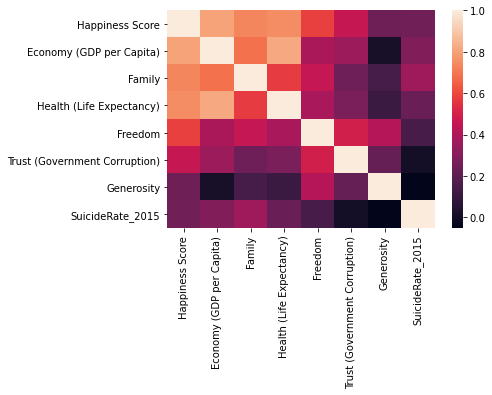

In [43]:
#create a correlation matrix using heat map
corr = suiciderate_happiness_report_2015.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [46]:
''''first, create a function that will return: 
1- a scatter plot with a regression line,
2- the Pearson Correlation Coefficient,
3- the p-value, 
4- if there is a correlation & if the correlation is negative or positive and if it is weak, moderate, strong, or very
strong, & if it is significant or not, 
beside this function, residual plot will be drawn to evaulate whether this relationship is or not a linear relationship'''

def correlation(x, y, t):
    sns.regplot(x, y)
    plt.title('Correlation between suicide rate &' + ' ' + t)
    pearson_coef, p_value = stats.pearsonr(x, y)
    print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of P =', p_value)
    if 0 <= pearson_coef <= 0.19:
        print('There is NO correlation')
    elif 0.20 <= pearson_coef <= 0.40:
        print('Weak positive correlation')
    elif 0.40 <= pearson_coef <= 0.59:
        print('Moderate positive correlation')
    elif 0.60 <= pearson_coef <= 0.79:
        print('Strong positive correlation')
    elif 0.80 <= pearson_coef <= 1:
        print('Very stong positive correlation')
    elif -0.19 <= pearson_coef <= -0.01:
        print('There is NO correlation')
    elif -0.39 <= pearson_coef <= -0.20:
        print('Weak negative correlation')
    elif -0.59 <= pearson_coef <= -0.40:
        print('Moderate negative correlation')
    elif -0.79 <= pearson_coef <= -0.60:
        print('Strong negative correlation')
    elif -0.80 >= pearson_coef >= -1:
        print('Very stong negative correlation')

    if p_value <= 0.05 and 0.20 <= pearson_coef <= 1:
        print('This positive correlation is significant')
    elif p_value <= 0.05 and -0.20 >= pearson_coef >= -1:
        print('This negative correlation is significant')
    elif p_value > 0.05 and 0.20 <= pearson_coef <= 1:
        print('This positive correlation is NOT significant')
    elif p_value > 0.05 and -0.20 >= pearson_coef >= -1:
        print('This negative correlation is NOT significant')


In [47]:
#second, make y2015 variable that presents suicide rate for 2015
y2015 = suiciderate_happiness_report_2015['SuicideRate_2015']

The Pearson Correlation Coefficient is 0.24969214561097003 with a P-value of P = 0.0040253334051316095
Weak positive correlation
This positive correlation is significant


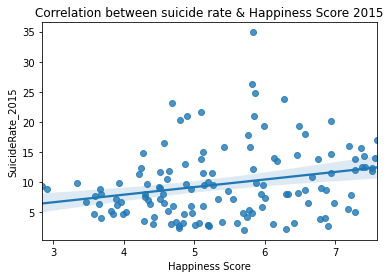

In [50]:
#now find the correlation between suicide rate for 2015 & each indicator of happiness report for 2015 (7 factors/indicators)
#correlation between suicide rate & Happiness Score 2015
correlation(suiciderate_happiness_report_2015['Happiness Score'], y2015,'Happiness Score 2015')

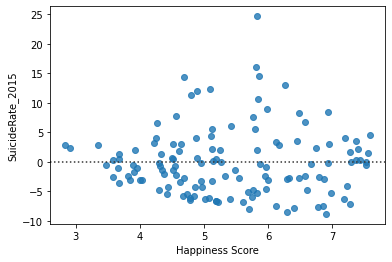

In [51]:
sns.residplot(suiciderate_happiness_report_2015['Happiness Score'], y2015)

The Pearson Correlation Coefficient is 0.29089831680774114 with a P-value of P = 0.0007495703026140347
Weak positive correlation
This positive correlation is significant


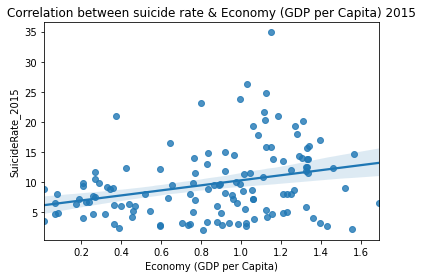

In [53]:
#correlation between suicide rate & Economy (GDP per Capita) 2015
correlation(suiciderate_happiness_report_2015['Economy (GDP per Capita)'], y2015,'Economy (GDP per Capita) 2015')

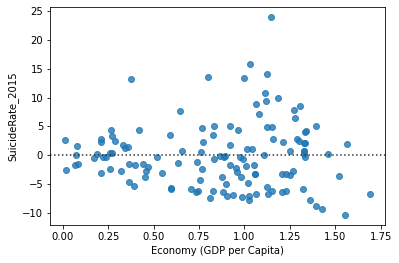

In [54]:
sns.residplot(suiciderate_happiness_report_2015['Economy (GDP per Capita)'], y2015)

The Pearson Correlation Coefficient is 0.36147263210601954 with a P-value of P = 2.2160088066931495e-05
Weak positive correlation
This positive correlation is significant


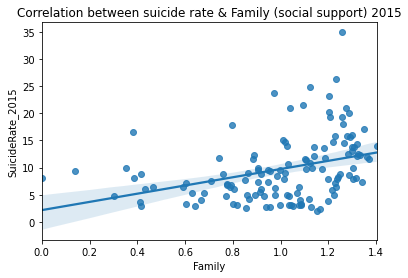

In [55]:
#correlation between suicide rate & Family (social support) 2015
correlation(suiciderate_happiness_report_2015['Family'], y2015,'Family (social support) 2015')

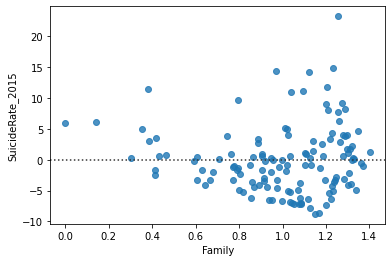

In [56]:
sns.residplot(suiciderate_happiness_report_2015['Family'], y2015)

The Pearson Correlation Coefficient is 0.23621879711781757 with a P-value of P = 0.006601848024254784
Weak positive correlation
This positive correlation is significant


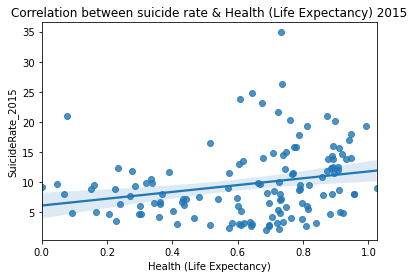

In [57]:
#correlation between suicide rate & Health (Life Expectancy) 2015
correlation(suiciderate_happiness_report_2015['Health (Life Expectancy)'], y2015,'Health (Life Expectancy) 2015')

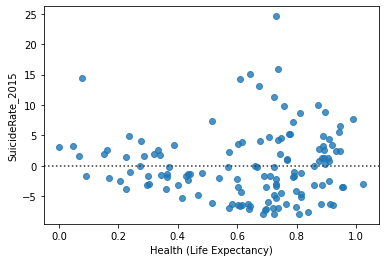

In [58]:
sns.residplot(suiciderate_happiness_report_2015['Health (Life Expectancy)'], y2015)

The Pearson Correlation Coefficient is 0.14835637530427356 with a P-value of P = 0.09081504980639026
There is NO correlation


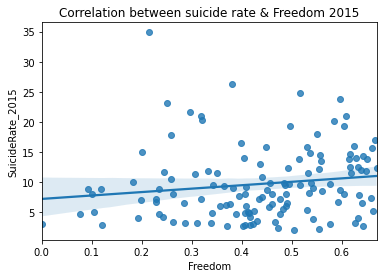

In [62]:
#correlation between suicide rate & Freedom 2015
correlation(suiciderate_happiness_report_2015['Freedom'], y2015,'Freedom 2015')

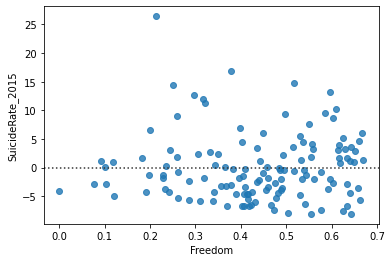

In [63]:
sns.residplot(suiciderate_happiness_report_2015['Freedom'], y2015)

The Pearson Correlation Coefficient is 0.003920763559688643 with a P-value of P = 0.9645494785055182
There is NO correlation


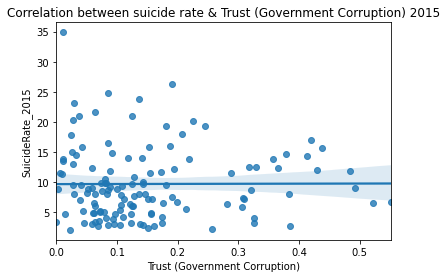

In [64]:
#correlation between suicide rate & Trust (Government Corruption) 2015
correlation(suiciderate_happiness_report_2015['Trust (Government Corruption)'], y2015,'Trust (Government Corruption) 2015')

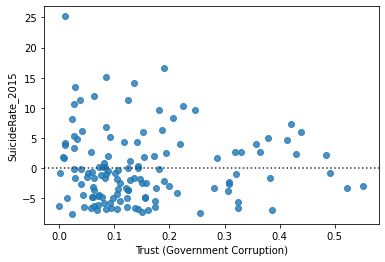

In [65]:
sns.residplot(suiciderate_happiness_report_2015['Trust (Government Corruption)'], y2015)

The Pearson Correlation Coefficient is -0.05045986898548821 with a P-value of P = 0.5670718831148069
There is NO correlation


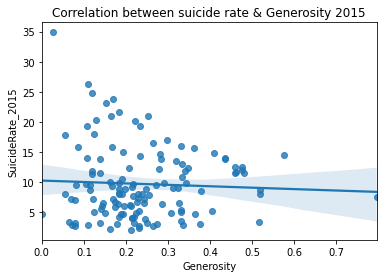

In [52]:
#correlation between suicide rate & Generosity 2015
correlation(suiciderate_happiness_report_2015['Generosity'], y2015,'Generosity 2015')

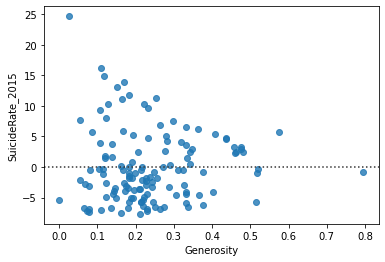

In [66]:
sns.residplot(suiciderate_happiness_report_2015['Generosity'], y2015)

In [67]:
''''based on this analysis, there are weak positive correlations between suicide rate (as the dependent variable/ target) 
& Happiness Score, Economy (GDP per Capita), Family and Health (Life Expectancy) for 2015 (as independent variables/ predictors)
and these correlations are significant'''

In [68]:
#to be more sure, let's apply the analysis on the suicide rate & happiness report for 2016 datset

In [69]:
#see the correlation between the variables in the suicide rate & happiness report for 2016 datset
suiciderate_happiness_report_2016.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,SuicideRate_2016
Happiness Score,1.000000,0.805731,0.727682,0.789251,0.593817,0.464710,0.215439,0.276766
Economy (GDP per Capita),0.805731,1.000000,0.712244,0.836156,0.389879,0.342201,0.003712,0.343959
Family,0.727682,0.712244,1.000000,0.622839,0.459686,0.258097,0.153341,0.398522
Health (Life Expectancy),0.789251,0.836156,0.622839,1.000000,0.385867,0.288839,0.082110,0.308110
Freedom,0.593817,0.389879,0.459686,0.385867,1.000000,0.511563,0.396102,0.149709
Trust (Government Corruption),0.464710,0.342201,0.258097,0.288839,0.511563,1.000000,0.267328,0.057626
Generosity,0.215439,0.003712,0.153341,0.082110,0.396102,0.267328,1.000000,-0.012547
SuicideRate_2016,0.276766,0.343959,0.398522,0.308110,0.149709,0.057626,-0.012547,1.000000


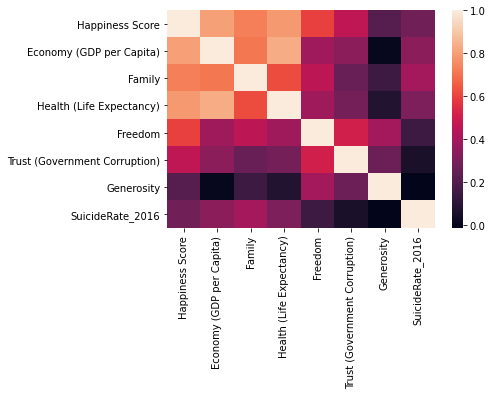

In [70]:
#create a correlation matrix using heat map
corr = suiciderate_happiness_report_2016.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [71]:
#make y2016 variable that presents suicide rate for 2016
y2016 = suiciderate_happiness_report_2016['SuicideRate_2016']

The Pearson Correlation Coefficient is 0.27676597926752955 with a P-value of P = 0.001434358771619454
Weak positive correlation
This positive correlation is significant


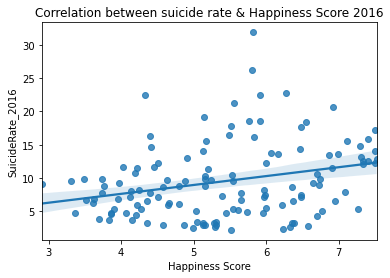

In [72]:
'''we will use the correlation function we've created to find the correlation between suicide rate for 2015 & each indicator
of happiness report for 2016 (7 factors/indicators)'''
#correlation between suicide rate & Happiness Score 2015
correlation(suiciderate_happiness_report_2016['Happiness Score'], y2016,'Happiness Score 2016')

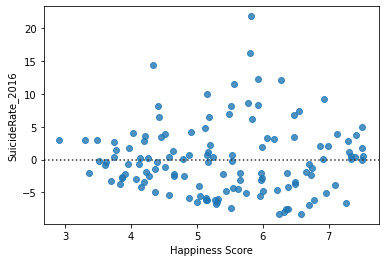

In [73]:
sns.residplot(suiciderate_happiness_report_2016['Happiness Score'], y2016)

The Pearson Correlation Coefficient is 0.34395868691788917 with a P-value of P = 6.154306342692557e-05
Weak positive correlation
This positive correlation is significant


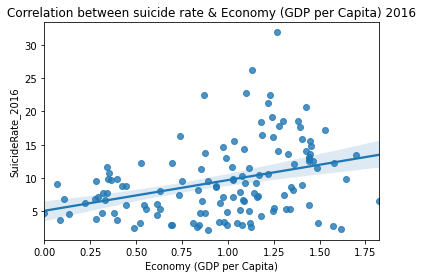

In [59]:
#correlation between suicide rate & Economy (GDP per Capita) 2016
correlation(suiciderate_happiness_report_2016['Economy (GDP per Capita)'], y2016,'Economy (GDP per Capita) 2016')

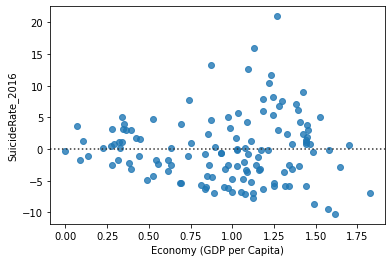

In [74]:
sns.residplot(suiciderate_happiness_report_2016['Economy (GDP per Capita)'], y2016)

The Pearson Correlation Coefficient is 0.39852179778191205 with a P-value of P = 2.6530309008460027e-06
Weak positive correlation
This positive correlation is significant


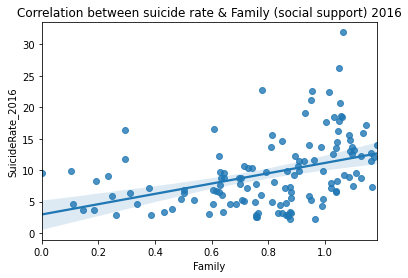

In [60]:
#correlation between suicide rate & Family (social support) 2016
correlation(suiciderate_happiness_report_2016['Family'], y2016,'Family (social support) 2016')

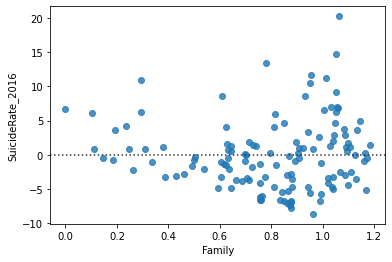

In [75]:
sns.residplot(suiciderate_happiness_report_2016['Family'], y2016)

The Pearson Correlation Coefficient is 0.3081100473814231 with a P-value of P = 0.00036215339299702434
Weak positive correlation
This positive correlation is significant


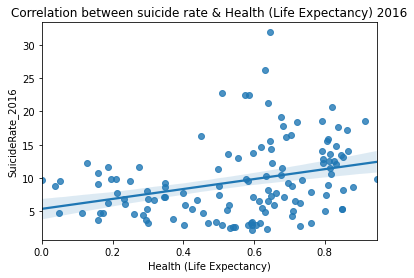

In [76]:
#correlation between suicide rate & Health (Life Expectancy) 2016
correlation(suiciderate_happiness_report_2016['Health (Life Expectancy)'], y2016,'Health (Life Expectancy) 2016')

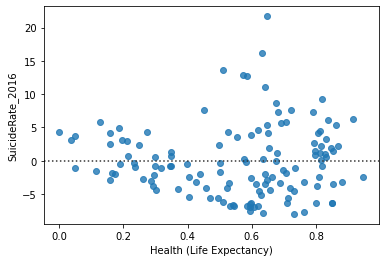

In [77]:
sns.residplot(suiciderate_happiness_report_2016['Health (Life Expectancy)'], y2016)

The Pearson Correlation Coefficient is 0.14970854983834767 with a P-value of P = 0.08912171442898578
There is NO correlation


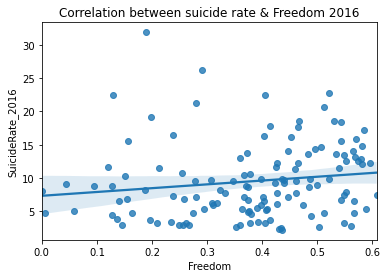

In [78]:
#correlation between suicide rate & Freedom 2016
correlation(suiciderate_happiness_report_2016['Freedom'], y2016,'Freedom 2016')

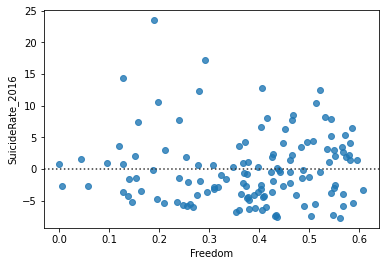

In [80]:
sns.residplot(suiciderate_happiness_report_2016['Freedom'], y2016)

The Pearson Correlation Coefficient is 0.05762605922817429 with a P-value of P = 0.5148955423356858
There is NO correlation


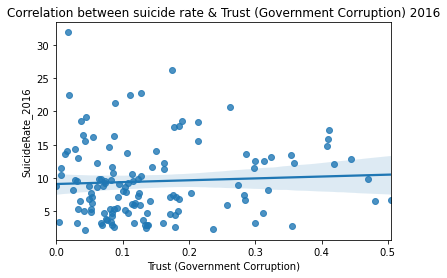

In [81]:
#correlation between suicide rate & Trust (Government Corruption) 2016
correlation(suiciderate_happiness_report_2016['Trust (Government Corruption)'], y2016,'Trust (Government Corruption) 2016')

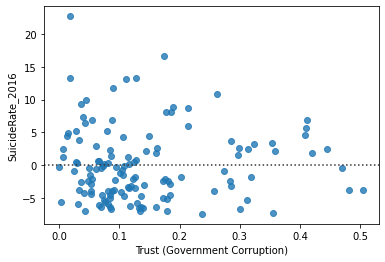

In [82]:
sns.residplot(suiciderate_happiness_report_2016['Trust (Government Corruption)'], y2016)

The Pearson Correlation Coefficient is -0.012546607198814303 with a P-value of P = 0.8873349329392579
There is NO correlation


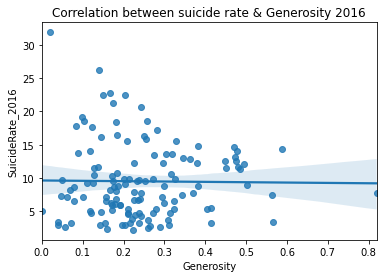

In [83]:
#correlation between suicide rate & Generosity 2016
correlation(suiciderate_happiness_report_2016['Generosity'], y2016,'Generosity 2016')

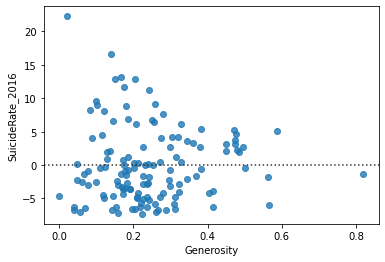

In [84]:
sns.residplot(suiciderate_happiness_report_2016['Generosity'], y2016)

In [65]:
'''' as in the previous analysis, there are weak positive correlations between suicide rate (as the dependent variable/ target) 
& Happiness Score, Economy (GDP per Capita), Family and Health (Life Expectancy) for 2016 (ad independent variables/ 
predictors) and these correlations are significant.'''

In [ ]:
#Results
'''A country having high happiness Score, high economy (GDP per Capita), high family and Health (Life Expectancy), 
tends to have a higher suicide rate.
In Addition, we can state that the developed countries tend to have higher suicide rates than the developing countries'''
'''to summarize, happier countries tends to have a higher suicide rate according to analysis applied to suicide rate in 2015 &
2016 and happiness report 2015 & 2016 databases'''